In [190]:
# Importing required Libraries
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Reading and Understanding Data

In [8]:
# Fetching Train data filename
train_filename = glob.glob('train*.csv')
print(train_filename)

['train_MpHjUjU.csv']


In [12]:
# Loading Train data
train_df = pd.read_csv('./' + train_filename[0])

In [13]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [15]:
train_df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [26]:
# Filtering Employee Data
emp_df = train_df.iloc[:,:-2]

In [59]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MMM-YY               19104 non-null  datetime64[ns]
 1   Emp_ID               19104 non-null  int64         
 2   Age                  19104 non-null  int64         
 3   Gender               19104 non-null  object        
 4   City                 19104 non-null  object        
 5   Education_Level      19104 non-null  object        
 6   Salary               19104 non-null  int64         
 7   Dateofjoining        19104 non-null  object        
 8   LastWorkingDate      1616 non-null   object        
 9   Joining Designation  19104 non-null  int64         
 10  Designation          19104 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 1.6+ MB


In [28]:
emp_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2


In [30]:
emp_df['MMM-YY'] = pd.to_datetime(emp_df['MMM-YY'])

In [31]:
emp_df['MMM-YY'].dtype

dtype('<M8[ns]')

In [42]:
# Fetching latest data of Employees
latest_df = emp_df.sort_values(by='MMM-YY').groupby('Emp_ID').tail(1)

In [61]:
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MMM-YY               2381 non-null   datetime64[ns]
 1   Emp_ID               2381 non-null   int64         
 2   Age                  2381 non-null   int64         
 3   Gender               2381 non-null   object        
 4   City                 2381 non-null   object        
 5   Education_Level      2381 non-null   object        
 6   Salary               2381 non-null   int64         
 7   Dateofjoining        2381 non-null   object        
 8   LastWorkingDate      1616 non-null   object        
 9   Joining Designation  2381 non-null   int64         
 10  Designation          2381 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 223.2+ KB


In [46]:
latest_df = latest_df.sort_values(by='Emp_ID')

In [47]:
latest_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3


In [50]:
# Grouping train data by Employee ID
by_ID = train_df.groupby('Emp_ID')

In [56]:
# Calculating Mean of Total Business Value and Quarterly Rating
bus_df = by_ID[['Total Business Value','Quarterly Rating']].mean().reset_index()

In [58]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Total Business Value  2381 non-null   float64
 2   Quarterly Rating      2381 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 55.9 KB


In [63]:
# Fetching latest Employee data and adding their average Business Value and ratings
df = pd.merge(latest_df, bus_df, on='Emp_ID')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Emp_ID                2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   object        
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   object        
 6   Salary                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   object        
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   2381 non-null   int64         
 10  Designation           2381 non-null   int64         
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
dtypes: datetime64[ns](

In [65]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0.0,1.0
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,253000.0,1.6


In [66]:
# Checking for null values
df.isnull().sum()

MMM-YY                    0
Emp_ID                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Salary                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Designation               0
Total Business Value      0
Quarterly Rating          0
dtype: int64

In [68]:
# Creating a variable 'Attrition' based on 'LastWorkingDate'
# If LastWorkingDate is null, it means that the Employee did not attrite.
df['Attrition'] = df['LastWorkingDate'].notnull()

In [69]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrtion
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0.0,1.0,False
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,253000.0,1.6,False


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Emp_ID                2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   object        
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   object        
 6   Salary                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   object        
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   2381 non-null   int64         
 10  Designation           2381 non-null   int64         
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
 13  Attrtion          

In [72]:
#df.to_csv('./preprocess/preprocess_df.csv', index=False)

In [76]:
# LastWorkingDate is null for existing employees, so filling those values with ReportingDate for further processing
df['LastWorkingDate'] = df['LastWorkingDate'].fillna(df['MMM-YY'])

In [77]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrtion
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2017-12-01 00:00:00,2,2,0.0,1.0,False
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2017-12-01 00:00:00,3,3,253000.0,1.6,False


In [79]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

In [80]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [81]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrtion
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2017-12-01,2,2,0.0,1.0,False
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2017-12-01,3,3,253000.0,1.6,False


In [82]:
# Calculating the number of working days of employees
df['WorkingDays'] = df['LastWorkingDate'] - df['Dateofjoining']

In [83]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrtion,WorkingDays
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True,78 days
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2017-12-01,2,2,0.0,1.0,False,25 days
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True,141 days
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True,58 days
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2017-12-01,3,3,253000.0,1.6,False,123 days


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   MMM-YY                2381 non-null   datetime64[ns] 
 1   Emp_ID                2381 non-null   int64          
 2   Age                   2381 non-null   int64          
 3   Gender                2381 non-null   object         
 4   City                  2381 non-null   object         
 5   Education_Level       2381 non-null   object         
 6   Salary                2381 non-null   int64          
 7   Dateofjoining         2381 non-null   datetime64[ns] 
 8   LastWorkingDate       2381 non-null   datetime64[ns] 
 9   Joining Designation   2381 non-null   int64          
 10  Designation           2381 non-null   int64          
 11  Total Business Value  2381 non-null   float64        
 12  Quarterly Rating      2381 non-null   float64        
 13  Att

In [99]:
# Extracting numerical values
df['WorkingDays'] = df['WorkingDays'].dt.days

In [100]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrtion,WorkingDays
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True,78
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2017-12-01,2,2,0.0,1.0,False,25
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True,141
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True,58
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2017-12-01,3,3,253000.0,1.6,False,123


In [124]:
#df = df.rename(columns={'Attrtion':'Attrition'})

In [101]:
#df.to_csv('./preprocess/preprocess_2.csv', index=True)

Data Visualization

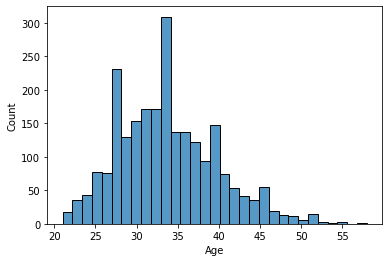

In [127]:
sns.histplot(df['Age'])
plt.show()

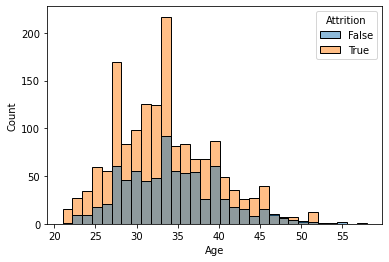

In [126]:
sns.histplot(x='Age', hue='Attrition', data=df)
plt.show()

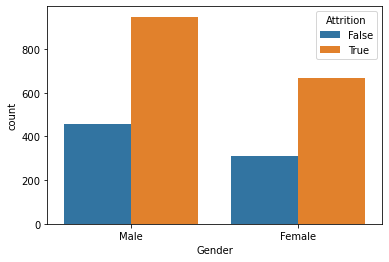

In [129]:
sns.countplot(x='Gender',hue='Attrition', data=df)
plt.show()

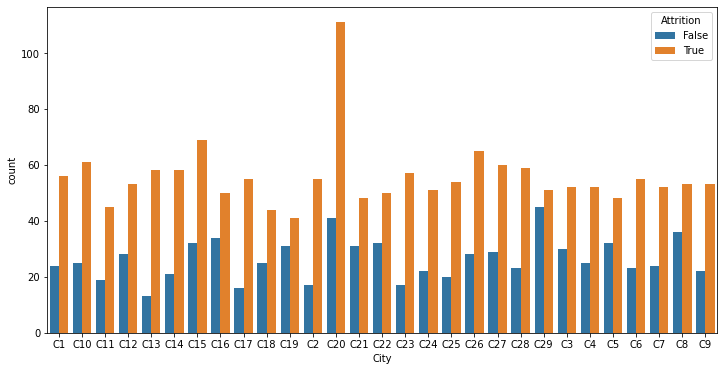

In [134]:
plt.figure(figsize=(12,6))
sns.countplot(x='City',hue='Attrition', data=df.sort_values(by='City'))
plt.show()

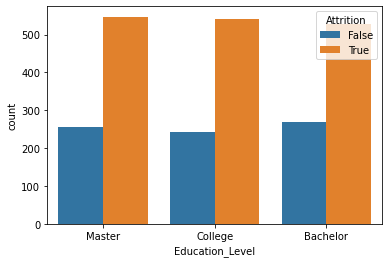

In [150]:
#plt.figure(figsize=(12,6))
sns.countplot(x='Education_Level',hue='Attrition', data=df)
plt.show()

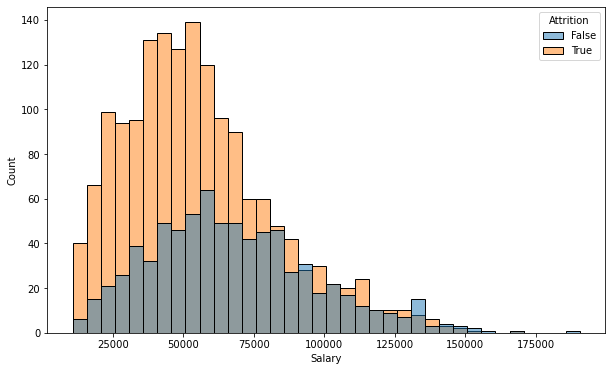

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(x='Salary', hue='Attrition', data=df, binwidth=5000)
plt.show()

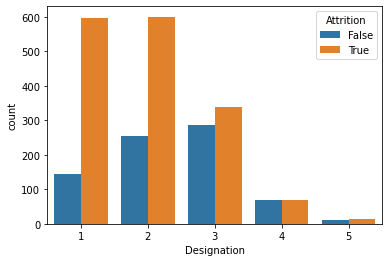

In [142]:
#plt.figure(figsize=(12,6))
sns.countplot(x='Designation',hue='Attrition', data=df.sort_values(by='City'))
plt.show()

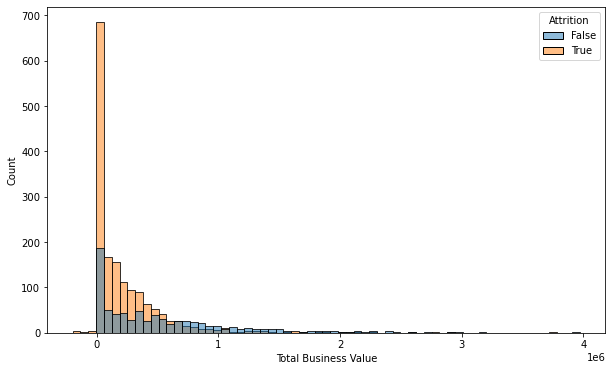

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(x='Total Business Value', hue='Attrition', data=df)
plt.show()

In [157]:
round(df['Quarterly Rating'], 1)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.6
       ... 
2376    2.6
2377    1.0
2378    1.7
2379    1.5
2380    2.3
Name: Quarterly Rating, Length: 2381, dtype: float64

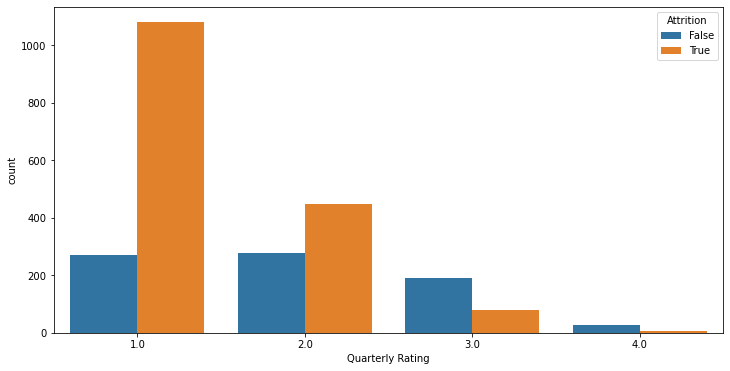

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(round(df['Quarterly Rating']),hue='Attrition', data=df)
plt.show()

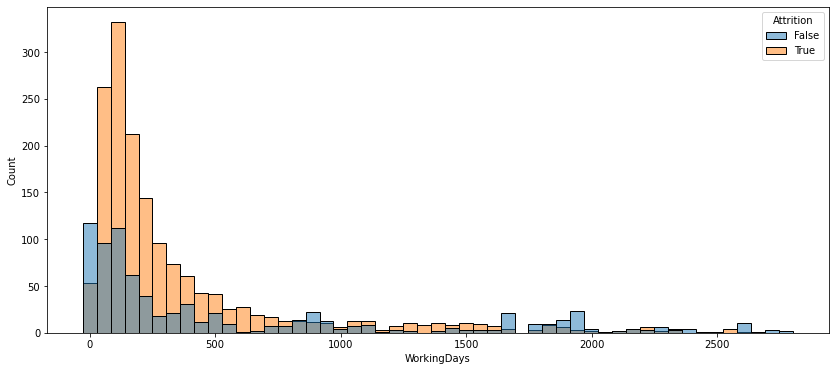

In [162]:
plt.figure(figsize=(14,6))
sns.histplot(x='WorkingDays', hue='Attrition', data=df)
plt.show()

Data Preparation

In [165]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition,WorkingDays
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,571860.0,2.0,True,78
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2017-12-01,2,2,0.0,1.0,False,25
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,70000.0,1.0,True,141
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,40120.0,1.0,True,58
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,2017-12-01,3,3,253000.0,1.6,False,123


In [166]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [167]:
dum_city = pd.get_dummies(df['City'], prefix='City', drop_first=True)

In [168]:
df = pd.concat([df, dum_city], 1)
df = df.drop('City',1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,2016-03-01,1,28,1,Master,57387,2015-12-24,2016-03-11,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,2,31,1,Master,67016,2017-11-06,2017-12-01,2,2,...,0,0,0,0,0,0,0,1,0,0
2,2017-04-01,4,43,1,Master,65603,2016-12-07,2017-04-27,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2016-03-01,5,29,1,College,46368,2016-01-09,2016-03-07,1,1,...,0,0,0,0,0,0,0,0,0,1
4,2017-12-01,6,31,0,Bachelor,78728,2017-07-31,2017-12-01,3,3,...,0,0,0,0,0,0,0,0,0,0


In [169]:
dum_edu = pd.get_dummies(df['Education_Level'], prefix='Edu', drop_first=True)
df = pd.concat([df, dum_edu], 1)
df = df.drop('Education_Level', 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,...,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Edu_College,Edu_Master
0,2016-03-01,1,28,1,57387,2015-12-24,2016-03-11,1,1,571860.0,...,0,0,0,0,0,0,0,0,0,1
1,2017-12-01,2,31,1,67016,2017-11-06,2017-12-01,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
2,2017-04-01,4,43,1,65603,2016-12-07,2017-04-27,2,2,70000.0,...,0,0,0,0,0,0,0,0,0,1
3,2016-03-01,5,29,1,46368,2016-01-09,2016-03-07,1,1,40120.0,...,0,0,0,0,0,0,0,1,1,0
4,2017-12-01,6,31,0,78728,2017-07-31,2017-12-01,3,3,253000.0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df['Difference_Designation'] = df['Designation'] - df['Joining Designation']

In [172]:
dum_joinDesig = pd.get_dummies(df['Joining Designation'], prefix='JoinDesignation', drop_first=True)
df = pd.concat([df, dum_joinDesig], 1)
df = df.drop('Joining Designation', 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Designation,Total Business Value,Quarterly Rating,...,City_C7,City_C8,City_C9,Edu_College,Edu_Master,Difference_Designation,JoinDesignation_2,JoinDesignation_3,JoinDesignation_4,JoinDesignation_5
0,2016-03-01,1,28,1,57387,2015-12-24,2016-03-11,1,571860.0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,2017-12-01,2,31,1,67016,2017-11-06,2017-12-01,2,0.0,1.0,...,1,0,0,0,1,0,1,0,0,0
2,2017-04-01,4,43,1,65603,2016-12-07,2017-04-27,2,70000.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,2016-03-01,5,29,1,46368,2016-01-09,2016-03-07,1,40120.0,1.0,...,0,0,1,1,0,0,0,0,0,0
4,2017-12-01,6,31,0,78728,2017-07-31,2017-12-01,3,253000.0,1.6,...,0,0,0,0,0,0,0,1,0,0


In [173]:
dum_Desig = pd.get_dummies(df['Designation'], prefix='Designation', drop_first=True)
df = pd.concat([df, dum_Desig], 1)
df = df.drop('Designation', 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Attrition,...,Edu_Master,Difference_Designation,JoinDesignation_2,JoinDesignation_3,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5
0,2016-03-01,1,28,1,57387,2015-12-24,2016-03-11,571860.0,2.0,True,...,1,0,0,0,0,0,0,0,0,0
1,2017-12-01,2,31,1,67016,2017-11-06,2017-12-01,0.0,1.0,False,...,1,0,1,0,0,0,1,0,0,0
2,2017-04-01,4,43,1,65603,2016-12-07,2017-04-27,70000.0,1.0,True,...,1,0,1,0,0,0,1,0,0,0
3,2016-03-01,5,29,1,46368,2016-01-09,2016-03-07,40120.0,1.0,True,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-01,6,31,0,78728,2017-07-31,2017-12-01,253000.0,1.6,False,...,0,0,0,1,0,0,0,1,0,0


In [174]:
dum_DiffDesig = pd.get_dummies(df['Difference_Designation'], prefix='Difference_Designation', drop_first=True)
df = pd.concat([df, dum_DiffDesig], 1)
df = df.drop('Difference_Designation', 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Attrition,...,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5,Difference_Designation_1,Difference_Designation_2,Difference_Designation_3,Difference_Designation_4
0,2016-03-01,1,28,1,57387,2015-12-24,2016-03-11,571860.0,2.0,True,...,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,2,31,1,67016,2017-11-06,2017-12-01,0.0,1.0,False,...,0,0,1,0,0,0,0,0,0,0
2,2017-04-01,4,43,1,65603,2016-12-07,2017-04-27,70000.0,1.0,True,...,0,0,1,0,0,0,0,0,0,0
3,2016-03-01,5,29,1,46368,2016-01-09,2016-03-07,40120.0,1.0,True,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-01,6,31,0,78728,2017-07-31,2017-12-01,253000.0,1.6,False,...,0,0,0,1,0,0,0,0,0,0


In [175]:
df['Attrition'] = df['Attrition'].map({True:1, False:0})

In [176]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Attrition,...,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5,Difference_Designation_1,Difference_Designation_2,Difference_Designation_3,Difference_Designation_4
0,2016-03-01,1,28,1,57387,2015-12-24,2016-03-11,571860.0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,2,31,1,67016,2017-11-06,2017-12-01,0.0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
2,2017-04-01,4,43,1,65603,2016-12-07,2017-04-27,70000.0,1.0,1,...,0,0,1,0,0,0,0,0,0,0
3,2016-03-01,5,29,1,46368,2016-01-09,2016-03-07,40120.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-01,6,31,0,78728,2017-07-31,2017-12-01,253000.0,1.6,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
#df.to_csv('./preprocess/preprocess_3.csv', index=False)

In [193]:
#df = pd.read_csv('./preprocess/preprocess_3.csv')

In [194]:
df = df.drop(['MMM-YY', 'Dateofjoining', 'LastWorkingDate'], 1)
df.head()

,Unnamed: 0,Emp_ID,Age,Gender,Salary,Total Business Value,Quarterly Rating,Attrition,WorkingDays,City_C10,...,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5,Difference_Designation_1,Difference_Designation_2,Difference_Designation_3,Difference_Designation_4
0,0,1,28,1,57387,571860.0,2.0,1,78,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,31,1,67016,0.0,1.0,0,25,0,...,0,0,1,0,0,0,0,0,0,0
2,2,4,43,1,65603,70000.0,1.0,1,141,0,...,0,0,1,0,0,0,0,0,0,0
3,3,5,29,1,46368,40120.0,1.0,1,58,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6,31,0,78728,253000.0,1.6,0,123,0,...,0,0,0,1,0,0,0,0,0,0


In [195]:
df = df.drop('Unnamed: 0', 1)
df.head()

,Emp_ID,Age,Gender,Salary,Total Business Value,Quarterly Rating,Attrition,WorkingDays,City_C10,City_C11,...,JoinDesignation_4,JoinDesignation_5,Designation_2,Designation_3,Designation_4,Designation_5,Difference_Designation_1,Difference_Designation_2,Difference_Designation_3,Difference_Designation_4
0,1,28,1,57387,571860.0,2.0,1,78,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31,1,67016,0.0,1.0,0,25,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,43,1,65603,70000.0,1.0,1,141,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5,29,1,46368,40120.0,1.0,1,58,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,31,0,78728,253000.0,1.6,0,123,0,1,...,0,0,0,1,0,0,0,0,0,0


In [196]:
# Saving Preprocessed File
df.to_csv('./preprocess/preprocess_5.csv', index=False)